In [26]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/images.zip 

--2020-04-28 10:49:28--  https://fmi-unibuc-ia.github.io/ia/Data/images.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.111.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1373898 (1.3M) [application/zip]
Saving to: ‘images.zip.1’

images.zip.1        100%[===================>]   1.31M  --.-KB/s    in 0.1s    

2020-04-28 10:49:28 (10.2 MB/s) - ‘images.zip.1’ saved [1373898/1373898]



In [0]:
!unzip images.zip

Archive:  images.zip
  inflating: images/car_0.npy        
  inflating: images/car_1.npy        
  inflating: images/car_2.npy        
  inflating: images/car_3.npy        
  inflating: images/car_4.npy        
  inflating: images/car_5.npy        
  inflating: images/car_6.npy        
  inflating: images/car_7.npy        
  inflating: images/car_8.npy        


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
# Lista imaginii
!ls images

car_0.npy  car_2.npy  car_4.npy  car_6.npy  car_8.npy
car_1.npy  car_3.npy  car_5.npy  car_7.npy


In [0]:
# 1. Se dau următoarele 9 imagini de dimensiuni 400x600. Valorile acestora au fost salvate în fișierele “images/car_{idx}.npy”.
import os
files = os.listdir('images')
print(files)

['car_5.npy', 'car_4.npy', 'car_3.npy', 'car_0.npy', 'car_2.npy', 'car_7.npy', 'car_1.npy', 'car_8.npy', 'car_6.npy']


In [0]:
# a) Citiți imaginile din aceste fișiere și salvați-le într-un np.array (va avea dimensiunea 9x400x600).
images = []
for i in range(9):
    image = np.load("images/car_" + str(i) + ".npy")
    images.append(image)

np_images = np.array(images)
np_images.shape # dimensiunea 9x400x600

(9, 400, 600)

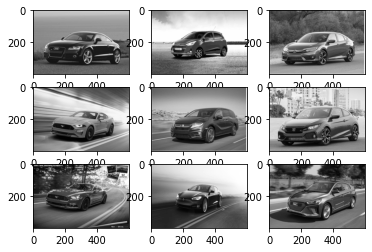

In [0]:
# Afisare imagini
for i in range(9):
    plt.subplot(3, 3, i + 1)

    plt.imshow(np_images[i], cmap='gray')

In [0]:
# b) Calculați suma valorilor pixelilor tuturor imaginilor
np.sum(np_images)

269782418

In [0]:
# c) Calculați suma valorilor pixelilor pentru fiecare imagine în parte
np.sum(np_images, axis=(1,2))

array([28685144, 39333369, 26884392, 33514492, 29317095, 35118308,
       22727807, 32168248, 22033563], dtype=uint64)

In [0]:
# d) Afișați indexul imaginii cu suma maximă.
np.argmax(np.sum(np_images, axis=(1,2)))

1

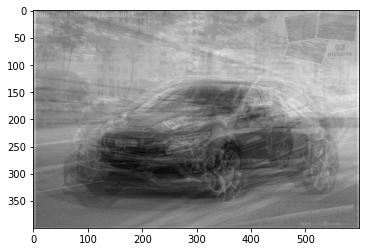

In [0]:
# e) Calculați imaginea medie și afișati-o.
mean_img = np.mean(np_images, axis = 0)

plt.imshow(mean_img.astype(np.uint8), cmap='gray')
plt.show()

In [0]:
# f) Cu ajutorul funcției np.std(images_array), calculați deviația standard a imaginilor. 
std = np.std(np_images)
std

67.4579383573686

In [0]:
# g) Normalizați imaginile. (se scade imaginea medie și se împarte rezultatul la deviația standard)
media = np.mean(np_images, axis = 0)
images2 = (np_images - media) / np.std(np_images)
print(images2)

[[[ 0.3409532   0.39860229  0.45295715 ...  0.3310705   0.32448203
    0.32283491]
  [ 0.27671564  0.28659834  0.29483393 ...  0.31954068  0.31624645
    0.31459933]
  [ 0.26683294  0.26024447  0.25036177 ...  0.30471663  0.30636375
    0.30306951]
  ...
  [-0.40519076 -0.42660328 -0.45131003 ... -0.40519076 -0.34754167
   -0.39201383]
  [-0.62096308 -0.62096308 -0.6423756  ... -0.48095814 -0.39695518
   -0.40024941]
  [-0.61931596 -0.60943326 -0.62755154 ... -0.56825533 -0.52872453
   -0.47601679]]

 [[-0.80049882 -0.74284973 -0.68849487 ... -0.05435486 -0.06094333
   -0.06259044]
  [-0.84991233 -0.84002963 -0.83179404 ... -0.05106062 -0.05435486
   -0.05600198]
  [-0.80049882 -0.80708729 -0.81696999 ... -0.00658847 -0.00494135
   -0.00823558]
  ...
  [-0.42001481 -0.72308432 -0.67367082 ...  0.02470675 -0.18447709
    0.06753179]
  [-0.51719471 -0.78402765 -0.83508827 ... -0.08070873 -0.48589949
    0.01482405]
  [-0.66378812 -0.69837757 -0.6720237  ... -0.03458946 -0.38048401
    0.

In [0]:
print(np.mean(images), np.std(images))
print(np.mean(images2), np.std(images2))

124.8992675925926 67.4579383573686
-2.654008700052078e-17 0.8365096370550695


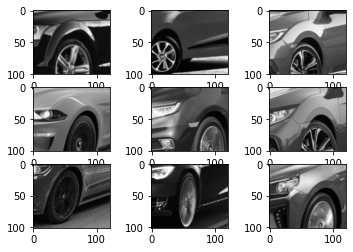

In [0]:
# h) Decupați fiecare imagine, afișând numai liniile cuprinse între 200 și 300, respectiv coloanele cuprinse între 280 și 400.
for i in range(9):
    plt.subplot(3, 3, i + 1)

    plt.imshow(np_images[i, 200:301, 280:401], cmap='gray')